# Object Detection Demo
Welcome to the object detection inference walkthrough!  This notebook will walk you step by step through the process of using a pre-trained model to detect objects in an image. Make sure to follow the [installation instructions](https://github.com/tensorflow/models/blob/master/object_detection/g3doc/installation.md) before you start.

# Imports

In [1]:
import numpy as np
import os
import sys
import tensorflow as tf

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

print("Import ok!")

Import ok!


## Env setup

In [2]:
# This is needed to display the images.
%matplotlib inline

## Object detection imports
Here are the imports from the object detection module.

In [3]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

print("Import ok!")

Import ok!


# Model preparation 

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_CKPT` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

In [4]:
#CKPT = 'faster_rcnn_resnet101_coco_11_06_2017/frozen_inference_graph.pb' # TODO change with trained network
CKPT = 'output_inference_graph3/frozen_inference_graph.pb'

PATH_TO_LABELS = 'label_map.pbtxt'

NUM_CLASSES = 14

## Load a (frozen) Tensorflow model into memory.

In [5]:
detection_graph = tf.Graph()

with detection_graph.as_default():
    
  od_graph_def = tf.GraphDef()

  with tf.gfile.GFile(CKPT, 'rb') as fid:
        
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
print("Loaded ok!")

Loaded ok!


## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [6]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'GreenLeft'}, 4: {'id': 4, 'name': 'GreenRight'}, 5: {'id': 5, 'name': 'RedLeft'}, 6: {'id': 6, 'name': 'RedRight'}, 7: {'id': 7, 'name': 'Yellow'}, 8: {'id': 8, 'name': 'off'}, 9: {'id': 9, 'name': 'RedStraight'}, 10: {'id': 10, 'name': 'GreenStraight'}, 11: {'id': 11, 'name': 'GreenStraightLeft'}, 12: {'id': 12, 'name': 'GreenStraightRight'}, 13: {'id': 13, 'name': 'RedStraightLeft'}, 14: {'id': 14, 'name': 'RedStraightRight'}}


## Helper code

In [7]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [8]:
from glob import glob

In [9]:
PATH_TO_TEST_IMAGES_DIR = 'test_images_udacity_sim'

print(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
TEST_IMAGE_PATHS = glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.png'))  # PNG OR JPG
#TEST_IMAGE_PATHS = glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
print("Length of test images:", len(TEST_IMAGE_PATHS))

# Size, in inches, of the output images.
IMAGE_SIZE = (8, 6)

test_images_udacity_sim/*.jpg
Length of test images: 10


Time in milliseconds 2485.3458404541016


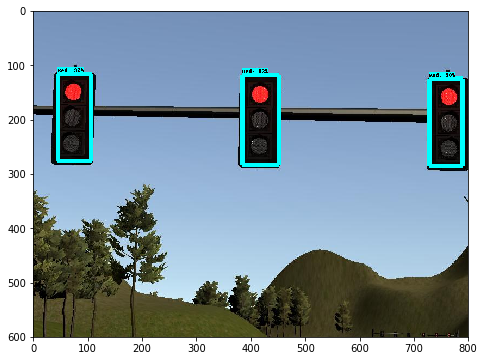

Time in milliseconds 1728.7969589233398


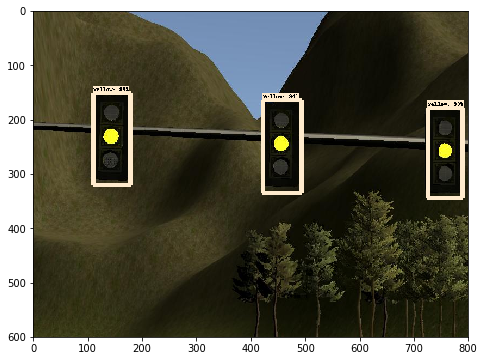

Time in milliseconds 1837.6185894012451


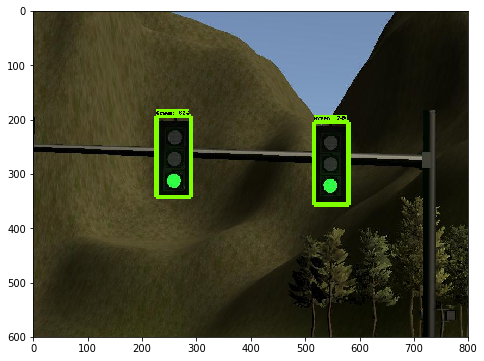

Time in milliseconds 1778.8684368133545


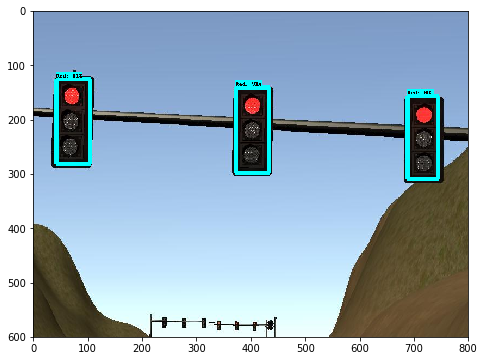

Time in milliseconds 1787.7886295318604


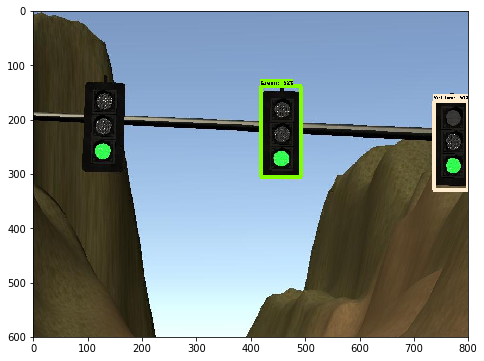

Time in milliseconds 1746.5248107910156


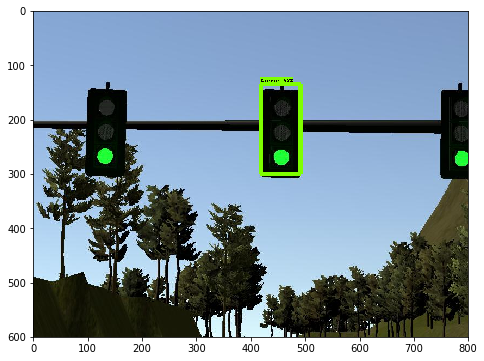

Time in milliseconds 1744.7378635406494


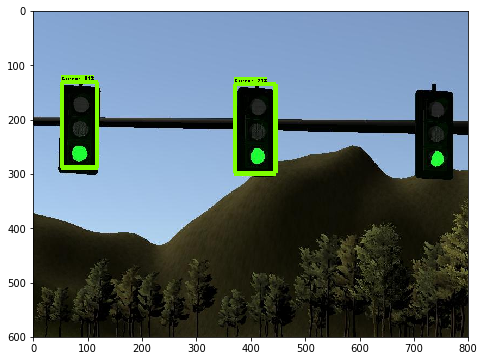

Time in milliseconds 1802.6759624481201


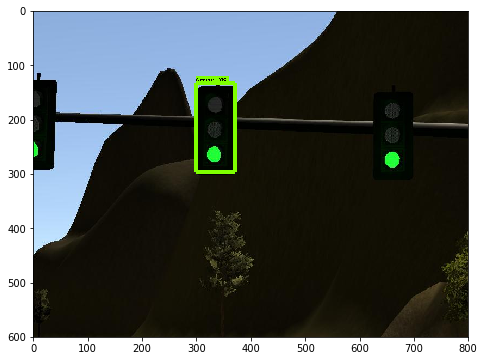

Time in milliseconds 1815.2060508728027


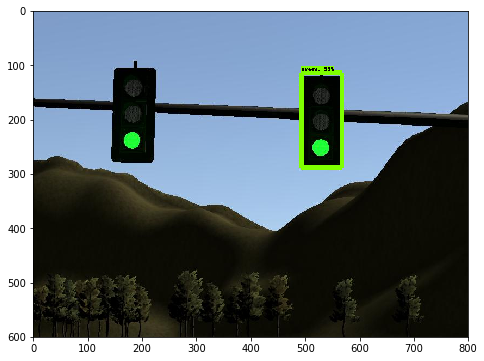

Time in milliseconds 1828.0503749847412


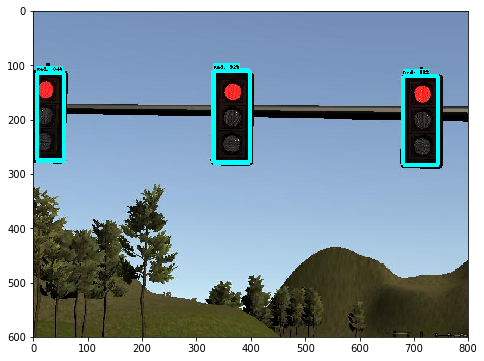

In [10]:
import time

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)

            time0 = time.time()

            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            time1 = time.time()

            print("Time in milliseconds", (time1 - time0) * 1000) 

            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
              image_np,
              np.squeeze(boxes),
              np.squeeze(classes).astype(np.int32),
              np.squeeze(scores),
              category_index,
              use_normalized_coordinates=True,
              line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            